In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Imoirt the packages to plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


# Import the data

In [3]:
# visualize the train date set
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# visualize the test data set
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# visualize the gender submission data set
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# **Cleaning the data**

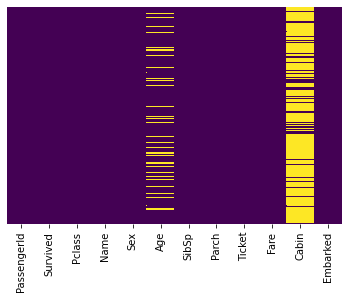

In [6]:
# check if there are missing data in the training set
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Because most of the cabins assigned to the passengers are unkowon it is decided to consider only the letter of the tickets and the unkown tickes are deifined with the the letter Z so they can be analysed as a cathegory

In [8]:
# each cabin shows on which deck it
train['Cabin'] = train['Cabin'].str[0]

In [11]:
# create the function
def input_Cabin(col):
    
    if pd.isnull(col):
        return 'Z'
    else:
        return col

In [12]:
# we run the function so we can consider the unkown deck as a deck itself
train['Cabin']  = train['Cabin'].apply(input_Cabin)

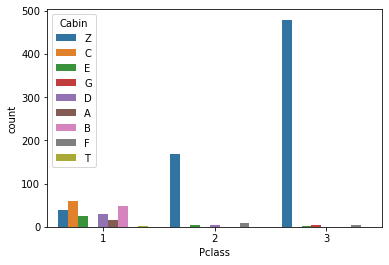

In [13]:
# it is checked if the type of cabin is related to the class
sns.countplot(x='Pclass',hue='Cabin',data=train)

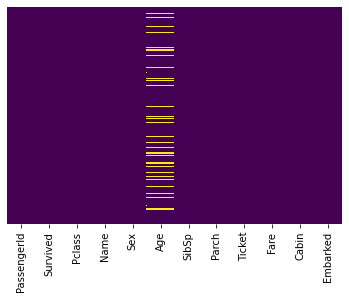

In [14]:
# check the missing data in the training set
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The next step is deciding what to do with the missing age

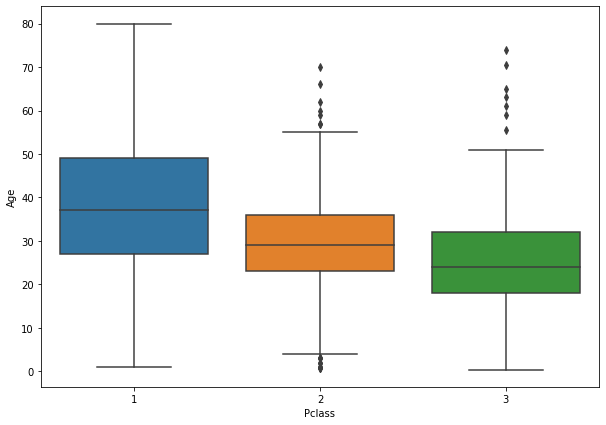

In [16]:
# it is checked if the age is related to the class
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

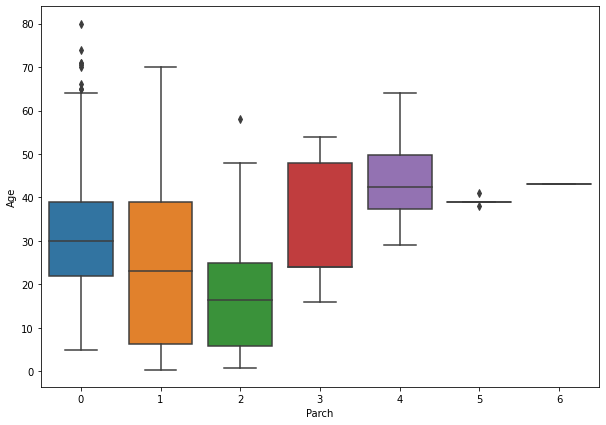

In [17]:
# it is checked if the age is related to the amount of parents/children on board
plt.figure(figsize=(10,7))
sns.boxplot(x='Parch',y='Age',data=train)

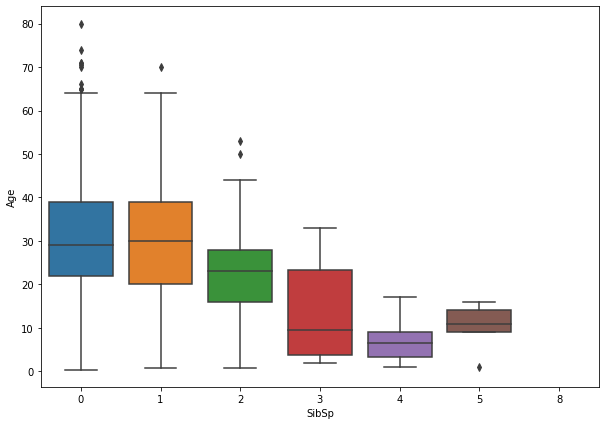

In [18]:
# it is checked if the age is related to the amount of siblings/spouce on board
plt.figure(figsize=(10,7))
sns.boxplot(x='SibSp',y='Age',data=train)

It can be visualised that different age cathegories tend to have a different number of parents/children and of siblings/spuce on board

In [20]:
# because we don't know any of the ages of the patients that had 8 siblings and spouses on board we only consider the average age of the gropus between 0 and 5

mean_sibsp = []
for s in [0,1,2,3,4,5]:
    mean_sibsp.append(train[train['SibSp']==s]['Age'].mean())

mean_parch = []
for p in [0,1,2,3,4,5,6]:
    mean_parch.append(train[train['Parch']==p]['Age'].mean())

In [21]:
# create the function
def input_Age(cols,mean_sibsp,mean_parch):
    Age = cols[0]
    SibSp = cols[1]
    Parch = cols[2]
    if pd.isnull(Age):
        if SibSp == 8:
            s = mean_parch[int(Parch)]
        else:
            s = mean_sibsp[int(SibSp)]
        p = mean_parch[int(Parch)]
        Age = (s + p)/2
        return Age
    else:
        return Age

In [23]:
train['Age']  = train[['Age','SibSp','Parch']].apply(input_Age,axis=1,args=(mean_sibsp,mean_parch))

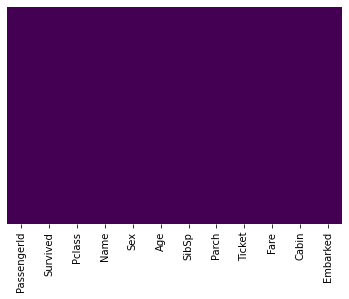

In [24]:
# check the missing data in the training set
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are still two passengers of which we don't know where they embarked.

In [26]:
# first it is checked if these passenger where alone or if they have some common features
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN


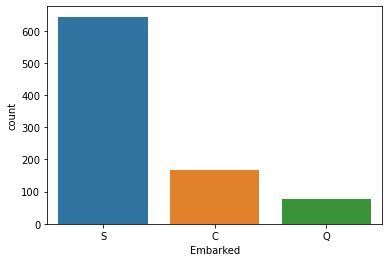

In [67]:
# it is checked how many people embarked in the different cities
sns.countplot(x='Embarked',data=train)

Because most people embarked in Southampton, it is more likely that these two passengers embarked in Southampton too.

In [71]:
# create the function
def input_Embarked(col):
    if pd.isnull(col):
        return 'S'
    else:
        return col

In [73]:
train['Embarked']  = train['Embarked'].apply(input_Embarked)

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Exploratory data analysis**

Now that the data have been cleaned they are ready to be analysed

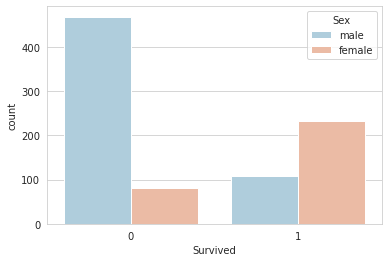

In [76]:
# it is fist check if one sex was more luckly to survive then another
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

Text(0.5, 0, 'Age')

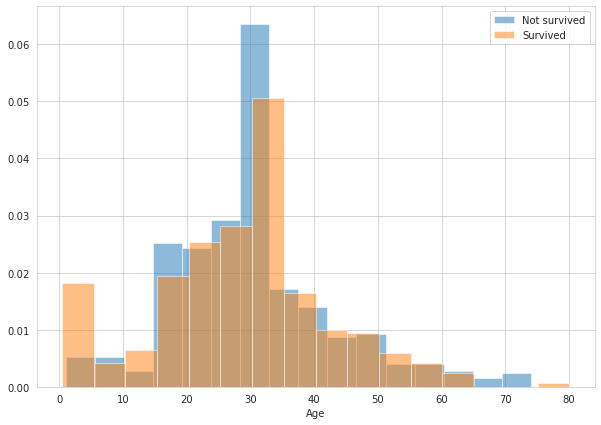

In [78]:
# then if the age contributes in any way with the chance to survive
plt.figure(figsize=(10,7))
plt.hist(train[train['Survived']==0]['Age'],label='Not survived', alpha=0.5,bins=16,density=True)
plt.hist(train[train['Survived']==1]['Age'],label='Survived',alpha=0.5,bins=16,density=True)
plt.legend()
plt.xlabel('Age')

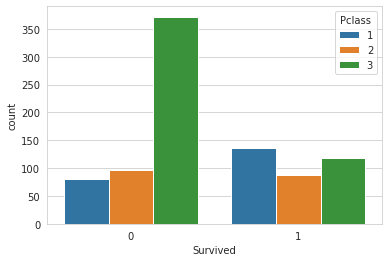

In [79]:
# if the class affects the survival chance
sns.countplot(x='Survived',hue='Pclass',data=train)

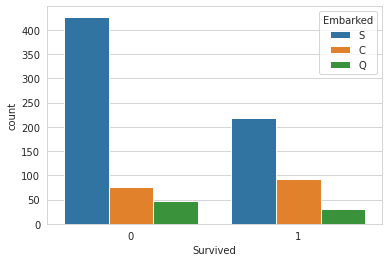

In [80]:
# if the port they have embarked from affects the survival chance
sns.countplot(x='Survived',hue='Embarked',data=train)

Text(0.5, 0, 'Fare')

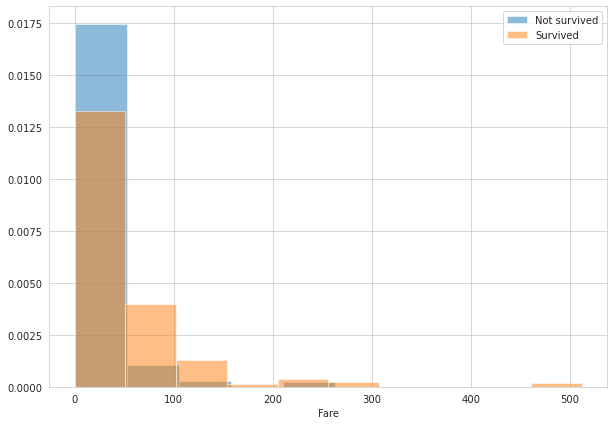

In [81]:
# then if the fere contributes in any way with the chance to survive
plt.figure(figsize=(10,7))
plt.hist(train[train['Survived']==0]['Fare'],label='Not survived', alpha=0.5,bins=5,density=True)
plt.hist(train[train['Survived']==1]['Fare'],label='Survived',alpha=0.5,bins=10,density=True)
plt.legend()
plt.xlabel('Fare')

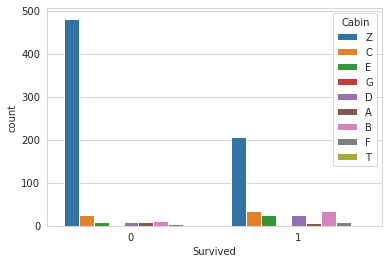

In [84]:
# plot to see if the cabin is related to survival chances
sns.countplot(x='Survived',hue='Cabin',data=train)